**Name-Surname:** Gianpietro Nicoletti <br>
**ID**: 2053042

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from scipy.integrate import odeint
from scipy import fftpack
import pandas as pd
from matplotlib.colors import LogNorm

In [2]:
#do you need to create the folder and download the files?
DOWNLOAD_FILE = False

In [3]:
if(DOWNLOAD_FILE):
    !mkdir data/ #creating an empty folder

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Text(0, 0.5, 'Y')

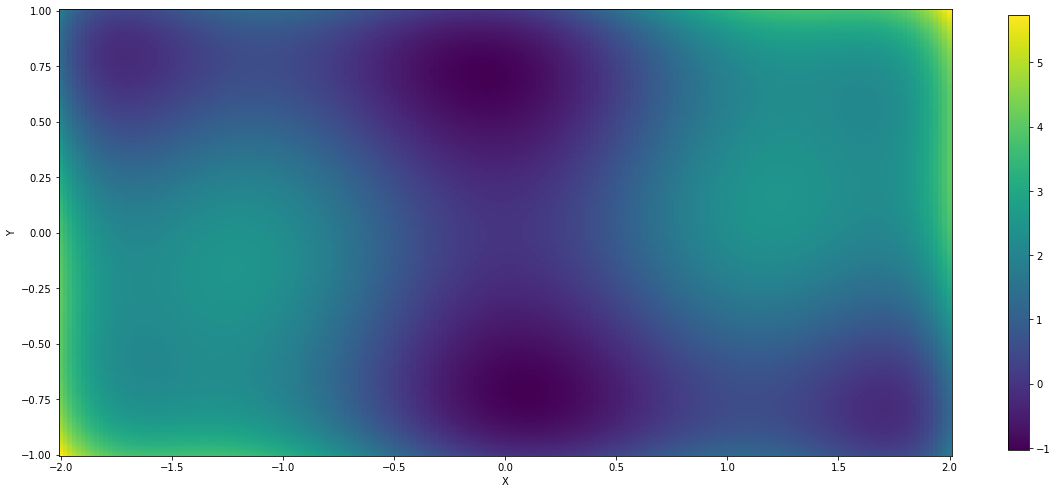

In [4]:
def camelback(x):
    
    f = (4-2.1*x[0]**2+((x[0]**4)/3))*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2
    return f


#creating the data
n = 200
x = np.linspace(-2,2,n)
y = np.linspace(-1,1,n)

x, y = np.meshgrid(x, y)

#computing the funxtion for each x-y couple
z = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        temp = np.array([x[i,j],y[i,j]])
        z[i,j] = camelback(temp)

#plotting
fig, ax = plt.subplots(figsize = (20,20))
image = ax.pcolor(x, y, z)
fig.colorbar(image, shrink=0.4)
ax.set_aspect(1)
ax.set_xlabel("X")
ax.set_ylabel("Y")


Text(0.5, 0.5, 'Y')

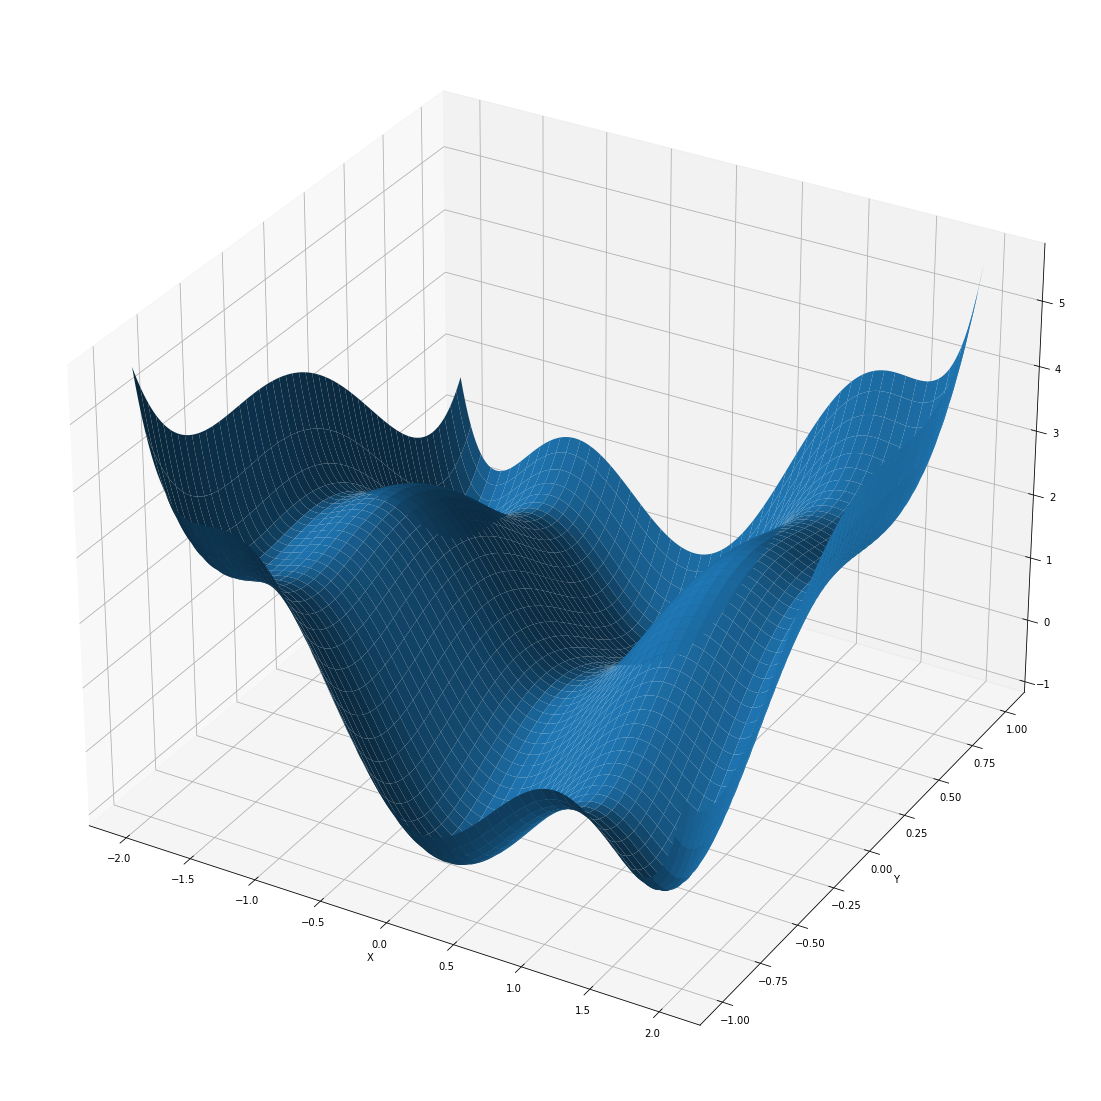

In [5]:
#3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (20,20))
surf = ax.plot_surface(x, y, z)

ax.set_xlabel("X")
ax.set_ylabel("Y")

In [6]:
#the point (-0.5,-0.25) is a good starting point around the global minima but far from the other local minima
sol = optimize.minimize(camelback, (-0.5,-0.25))

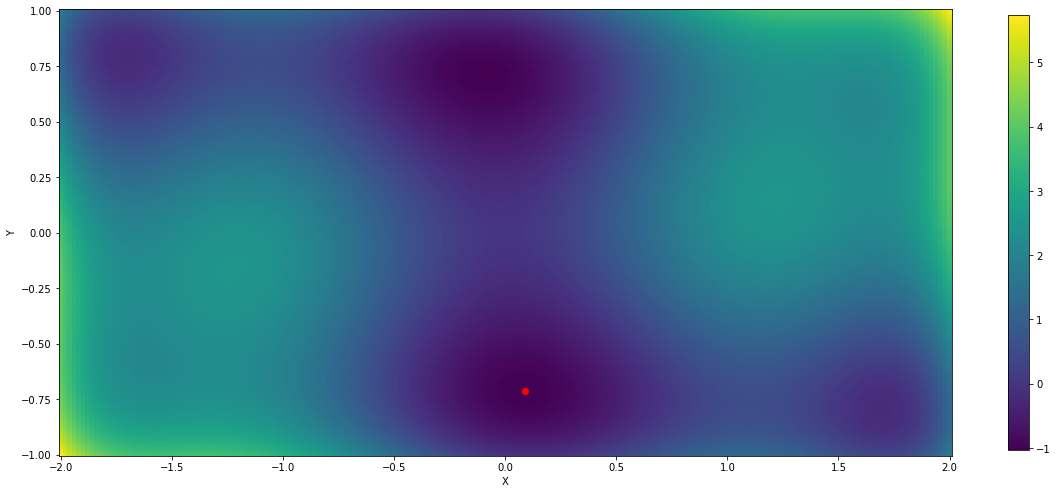

In [7]:
#plotting the solution 
fig, ax = plt.subplots(figsize = (20,20))
image = ax.pcolor(x, y, z)
fig.colorbar(image, shrink=0.4)
ax.set_aspect(1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.plot(sol["x"][0],sol["x"][1], "o", color = "r")

Text(0.5, 0.5, 'Y')

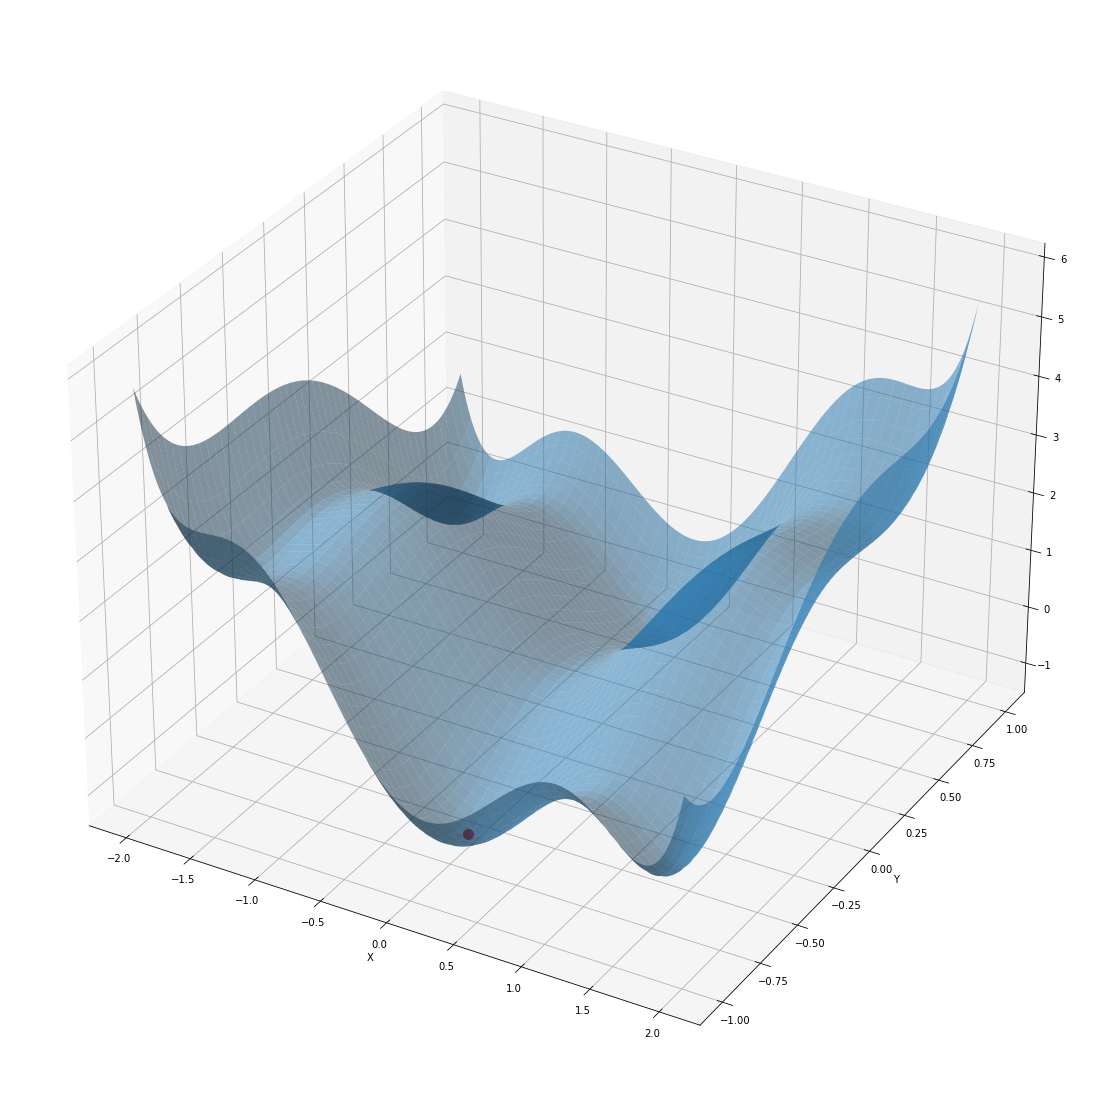

In [8]:
#3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (20,20))
surf = ax.plot_surface(x, y, z,alpha=0.5)

ax.scatter(sol["x"][0],sol["x"][1],camelback(sol["x"]),marker="o",color = "r",s=100)

ax.set_xlabel("X")
ax.set_ylabel("Y")

In [9]:
sol = optimize.minimize(camelback, (0,0))

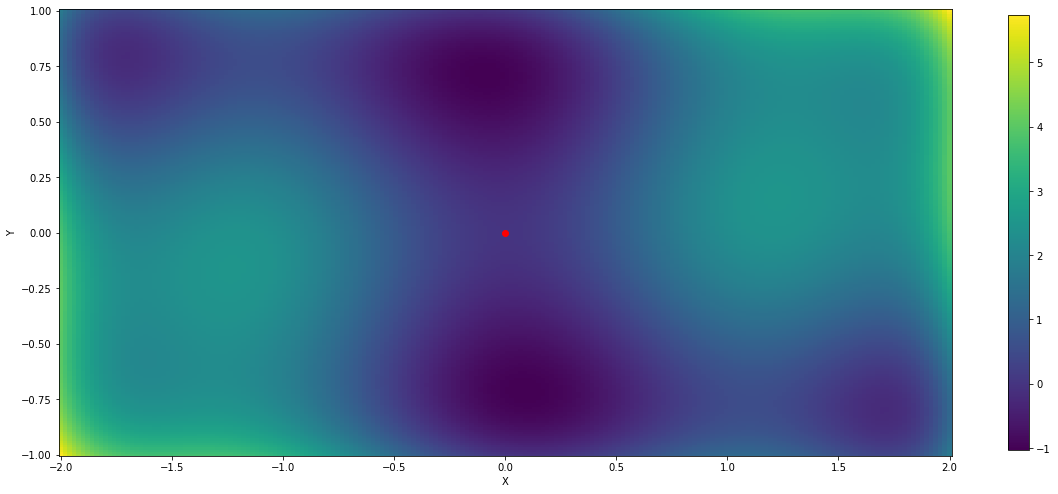

In [10]:
#plotting the solution 
fig, ax = plt.subplots(figsize = (20,20))
image = ax.pcolor(x, y, z)
fig.colorbar(image, shrink=0.4)
ax.set_aspect(1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.plot(sol["x"][0],sol["x"][1], "o", color = "r")

#since the point 0,0 is a saddle point the algoritm was not able to converges to a minima

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [11]:
def pendulum(W, time, Q=2, d=1.5, omega = 0.65):
    return(W[1], -(1/Q)*W[1]+np.sin(W[0])+d*np.cos(omega*time))

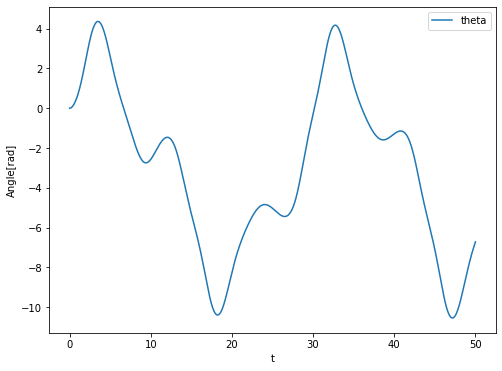

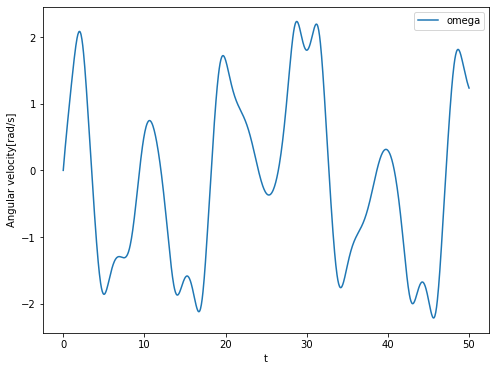

In [12]:
Wint = (0,0)
Q=2
d=1.5
omega=0.65
t = np.linspace(0, 50, 1000)
Winit = (0,0)
sol = odeint(pendulum, Winit, t, args=(Q,d, omega))


# plot theta and omega
plt.figure(figsize=(8, 6))
plt.plot(t, sol[:, 0], label="theta")
plt.xlabel("t")
plt.ylabel("Angle[rad]")
plt.legend(loc="best")


plt.figure(figsize=(8, 6))
plt.plot(t, sol[:, 1], label="omega")
plt.xlabel("t")
plt.ylabel("Angular velocity[rad/s]")
plt.legend(loc="best")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [13]:
if(DOWNLOAD_FILE):
    !wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

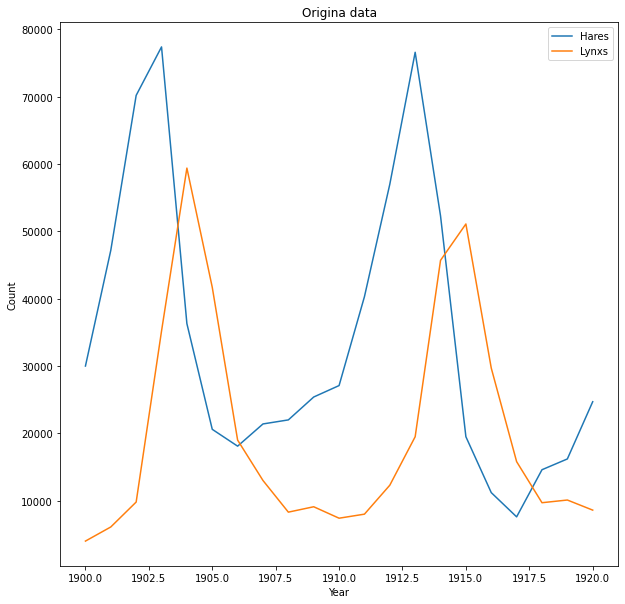

In [14]:
#reading the dataset 
dataset = np.loadtxt("data/populations.txt")

#extract the data
hares = dataset[:,1]
lynxs = dataset[:,2]
year = dataset[:,0]

#plotting
plt.figure(figsize=(10,10))
plt.plot(year,hares,label = "Hares")
plt.plot(year,lynxs, label = "Lynxs")
plt.title("Origina data")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()

Text(0.5, 1.0, 'Hares')

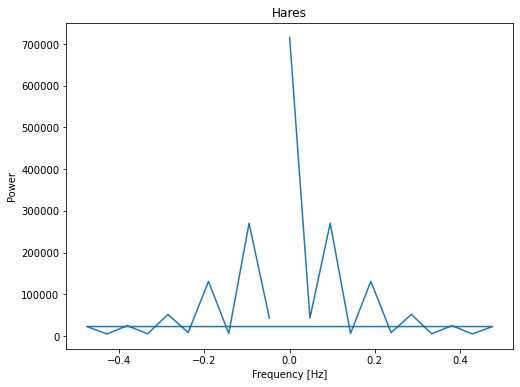

In [15]:
#perform the fft on the hares population
hares_fft = fftpack.fft(hares)
power = np.abs(hares_fft)
sample_freq = fftpack.fftfreq(hares.size, d=1)

#plotting the power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title("Hares")


In [16]:
#creating the mask
mask = np.where(sample_freq > 0)
freqs = sample_freq[mask]
powes = power[mask]

#computing the period as the frequency with the highest power
peak_freq = freqs[powes.argmax()]
print("The period for the hares is:", str(1/peak_freq)+" year")

The period for the hares is: 10.5 year


Text(0.5, 1.0, 'Lynxs')

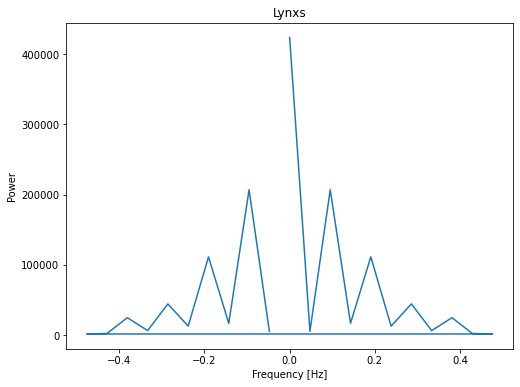

In [17]:
#same for the lynxs population

lynxs_fft = fftpack.fft(lynxs)
power = np.abs(lynxs_fft)
sample_freq = fftpack.fftfreq(lynxs.size, d=1)

plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title("Lynxs")

In [18]:
mask = np.where(sample_freq > 0)
freqs = sample_freq[mask]
powes = power[mask]

peak_freq = freqs[powes.argmax()]
print("The period for the lynxs is:", str(1/peak_freq)+" year")

The period for the lynxs is: 10.5 year


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

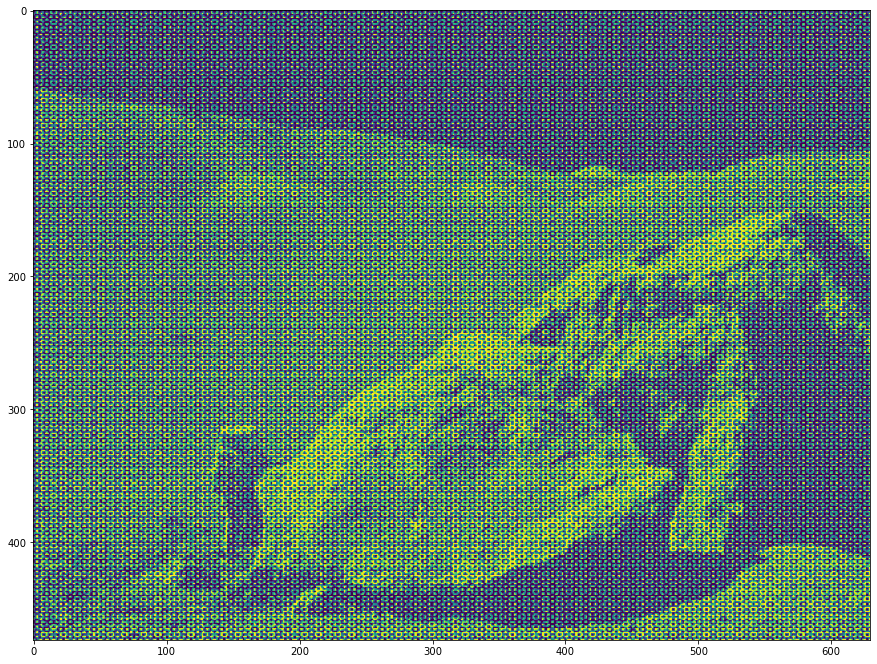

In [19]:
#reading the image and showing it
image = plt.imread("images/moonlanding.png")
plt.figure(figsize=(15,15))
plt.imshow(image)

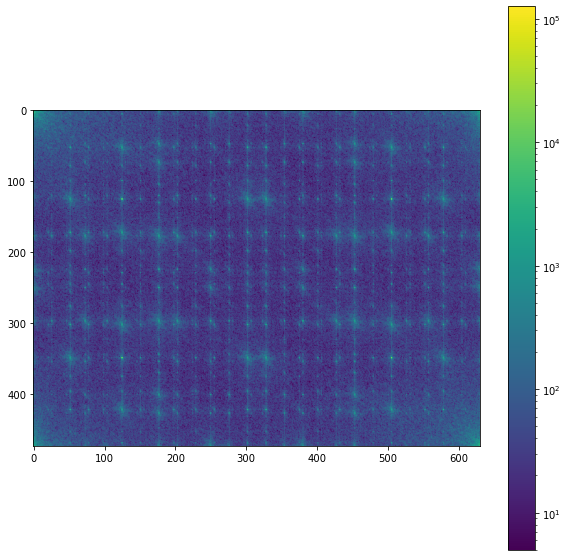

In [20]:
im_fft = fftpack.fft2(image)
im_abs = np.abs(im_fft)
figure = plt.figure(figsize=(10,10))
plt.imshow(im_abs, norm=LogNorm(vmin=5))

#i need the color bar to determine the highest values for the power
plt.colorbar()

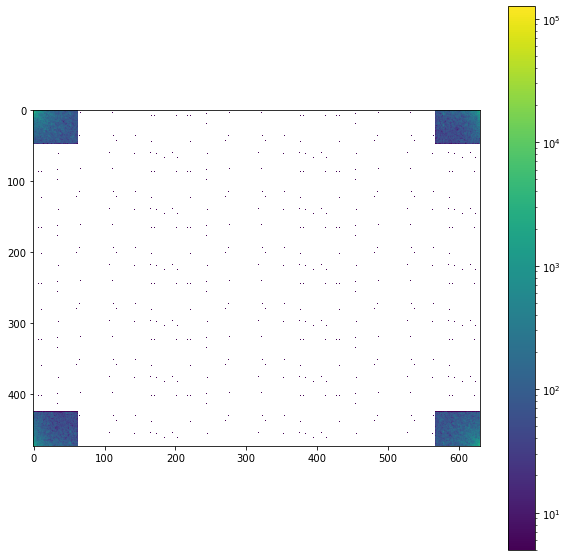

In [21]:
#the periodic noise is in the midle, so i need to keep the 4 corners
r,c = im_fft.shape
keepR = 0.1 #fraction of row to keep
keepC = 0.1
#set to 0 all rows with indices between r*keep_fraction() and r*(1-keep_fraction)
im_fft[int(r*keepR):int(r*(1-keepC))] = 0
#similarly with the columns
im_fft[:, int(c*keepR):int(c*(1-keepC))] = 0

im_abs = np.abs(im_fft)
figure = plt.figure(figsize=(10,10))
plt.imshow(im_abs, norm=LogNorm(vmin=5))
plt.colorbar()


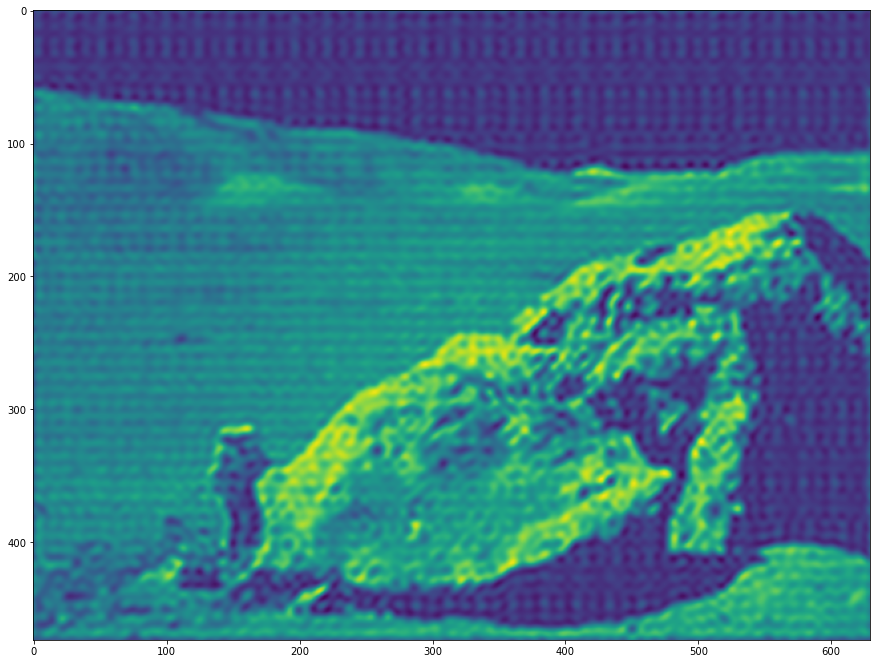

In [22]:
figure = plt.figure(figsize=(15,15))
filtered_im = fftpack.ifft2(im_fft)
plt.imshow(np.real(filtered_im))